## 🧩 Fase 6 – Visualización de Datos
Usar matplotlib y pandas para mostrar:
1.	Gráfico de barras: número de pacientes atendidos por servicio.
2.	Gráfico circular: distribución por sexo.
3.	Histograma: distribución de edades.
4.	Reporte tabular: promedio de montos por distrito.

### Nos conectamos a MongoDB
Extraemos los datos de las base de datos SaludDigital_2025 de MongoDB

In [2]:
# visualizar_datos
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))  # Omitimos el campo _id
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")

# Crear carpeta para guardar gráficos
reports_path = Path.home() / "Documents" / "SaludDigital_E1" / "reports"
reports_path.mkdir(parents=True, exist_ok=True)

# Vista previa
print("Vista previa de los datos:\n")
print(df.head())

✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 3000

Vista previa de los datos:

  id_paciente     nombre  edad sexo     distrito     servicio fecha_atencion  \
0      P00001  SinNombre  42.0  N/D   San Isidro  Odontología     16/11/2017   
1      P00002      María  32.0    M   San Isidro    Pediatría     13/03/2017   
2      P00003       José  88.0    F    Cajamarca  Ginecología     22/08/2017   
3      P00004  SinNombre  54.0    F  Desconocido  Ginecología     30/07/2017   
4      P00005        Ana  30.0    F    La Molina  SinServicio     02/01/2020   

    monto  
0  326.41  
1  457.37  
2  411.97  
3  350.56  
4   32.34  


### Gráfico de barras
Número de pacientes atendidos por servicio

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_24692\4003590334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=servicio_counts.index, y=servicio_counts.values, palette="viridis")


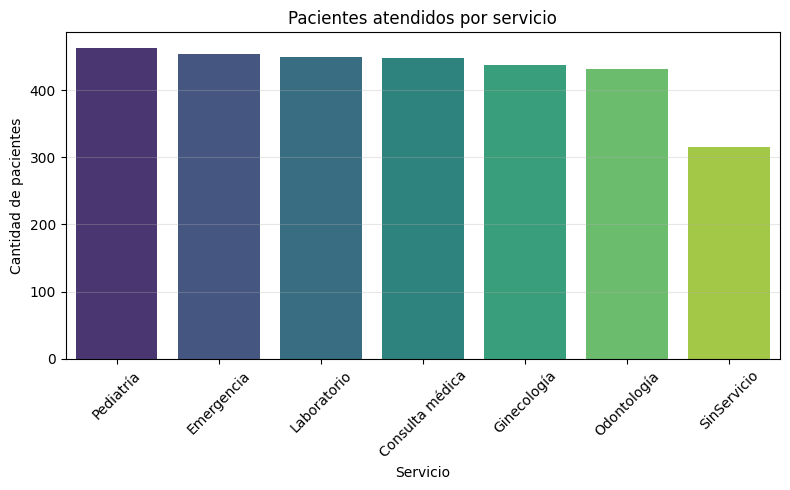

Gráfico de pacientes por servicio guardado en: C:\Users\ALEXANDER\Documents\SaludDigital_E1\reports\pacientes_antendidos_por_servicio.png


In [ ]:
plt.figure(figsize=(8, 5))
servicio_counts = df["servicio"].value_counts()

sns.barplot(x=servicio_counts.index, y=servicio_counts.values, palette="viridis")
plt.title("Pacientes atendidos por servicio")
plt.xlabel("Servicio")
plt.ylabel("Cantidad de pacientes")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_antendidos_por_servicio.png")
plt.show()

print(f"Gráfico de pacientes por servicio guardado en: {reports_path / 'pacientes_antendidos_por_servicio.png'}")

### Gráfico circular
Gráfico circular de los pacientes distribuidos por sexo

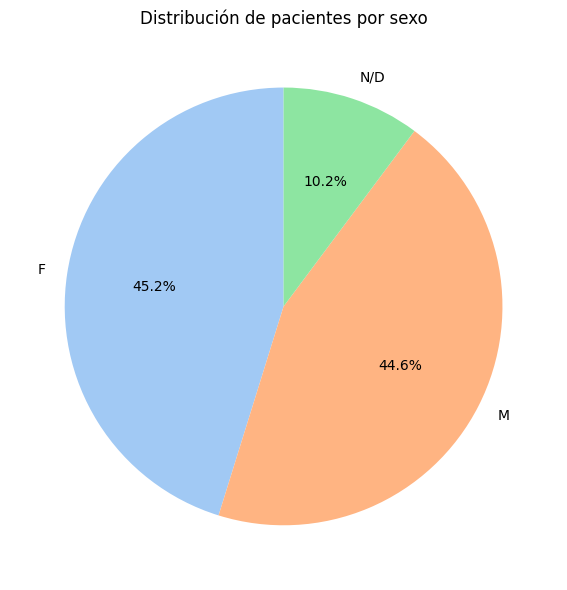

Gráfico de distribución por sexo guardado en: C:\Users\ALEXANDER\Documents\SaludDigital_E1\reports\distribucion_por_sexo.png


In [7]:
plt.figure(figsize=(6, 6))
sexo_counts = df["sexo"].value_counts()

plt.pie(
    sexo_counts.values,
    labels=sexo_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribución de pacientes por sexo")
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

print(f"Gráfico de distribución por sexo guardado en: {reports_path / 'distribucion_por_sexo.png'}")

## Histograma
Pacientes distribuidos por edades.

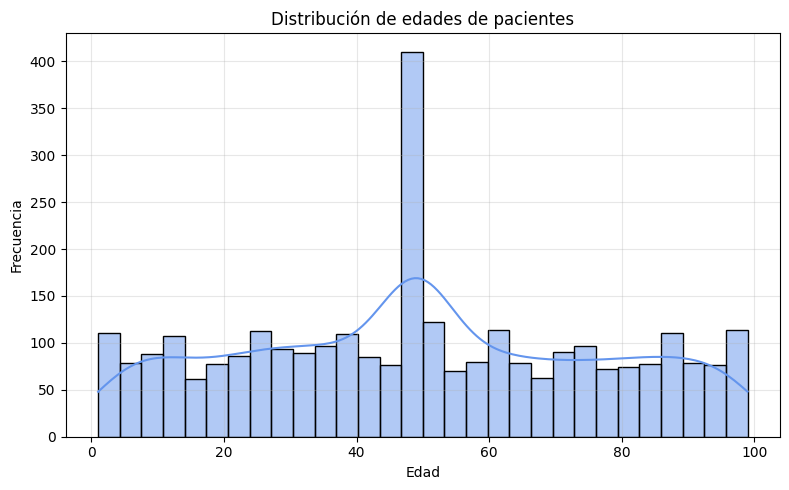

Histograma de edades guardado en: C:\Users\ALEXANDER\Documents\SaludDigital_E1\reports\distribucion_por_edades.png


In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["edad"], bins=30, kde=True, color="cornflowerblue")
plt.title("Distribución de edades de pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_edades.png")
plt.show()

print(f"Histograma de edades guardado en: {reports_path / 'distribucion_por_edades.png'}")

## Reporte tabular
Promedio de montos por distrito

In [9]:
reporte_montos = df.groupby("distrito")["monto"].mean().round(2).reset_index()
reporte_montos.columns = ["Distrito", "Monto Promedio (S/)"]

print("Promedio de montos por distrito:\n")
print(reporte_montos)

Promedio de montos por distrito:

      Distrito  Monto Promedio (S/)
0    Cajamarca               233.27
1       Callao               220.77
2  Desconocido               235.12
3    La Molina               234.09
4        Lince               241.71
5   Miraflores               222.79
6   San Isidro               250.98
7        Surco               233.67
